# PROJECT STARTS HERE

# Importing Libraries and Modules

In [2]:
import sklearn 
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import time
import mediapipe as mp
import csv

In [38]:
import dill

In [40]:
# To save variable of the last session (avoid re-executing the cells)
# dill.dump_session('base_variables2.db')

In [5]:
# To load session variables
# dill.load_session('base_variables1.db')

# Frame Extraction

In [29]:
# Folder path of dataset
# video_path = r"C:\Users\revan\Downloads\00335.mp4"
# folder_path = r'D:\WLASL Datasets\Kaggle_WLASL_withVideosInClassFolders\dataset\SL'
folder_path = r'D:\FYP_HWU\Videos'
DATA_PATH = r'D:\FYP_HWU'
# output_csv = os.path.join('dummy_dataset2')

In [38]:
# List of actions to train model with (11 classes or actions)
# actions = np.array(['Hello', 'Thank You', 'I Love You', 'Namaste'])
actions = [
'accident', 
'call', 
'help', 
'man', 
'murder', 
'woman', 
'danger',
'police', 
'follow',
'child',
'sick'
]


In [20]:
temp_actions = ['follow']

In [39]:
len(actions)

10

### Counting number of videos under each action in the dataset

In [40]:
# Initializing variables
video_count = {}

# Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
for root, dirs, files in os.walk(folder_path):
    for i in dirs: #loop through each of the keywords or actions in the dataset
        if (i in actions): #if the keyword is present in the shortlisted list of actions
            for root, dirs, files in os.walk(os.path.join(folder_path, i)):
                video_count[i] = len(files) 
                break
    break

print(video_count)

{'accident': 13, 'call': 12, 'child': 9, 'danger': 11, 'help': 14, 'man': 12, 'murder': 13, 'police': 10, 'sick': 10, 'woman': 11}


In [46]:
video_count = {'accident': 13, 'call': 12, 'child': 9, 'danger': 11, 'help': 14, 'man': 12, 'murder': 13, 'police': 10, 'sick': 10, 'woman': 11}

In [11]:
temp_video_count = {'follow': 9}

In [41]:
len(video_count)

10

### Getting the video paths of the videos

In [ ]:
# # Creating a dictionary for the actions and the count of videos for the chosen actions to train the model
# for action in actions:
#     classes[action] = my_dict[action]
# print(classes)

In [42]:
video_paths = {}
# Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
for root, dirs, files in os.walk(folder_path):
    
    for action in actions:
        for root, dirs, files in os.walk(os.path.join(folder_path, action)):
            for i in range (len(files)):
                files[i] = os.path.join(folder_path, action, files[i])
            video_paths[action] = files
            break
    break

# print(video_paths)

In [22]:
# temp_video_path = {}
# temp_video_path['follow'] = video_paths['follow']

In [34]:
print(temp_video_path)

{'follow': ['D:\\FYP_HWU\\Videos\\follow\\22715.mp4', 'D:\\FYP_HWU\\Videos\\follow\\22716.mp4', 'D:\\FYP_HWU\\Videos\\follow\\22717.mp4', 'D:\\FYP_HWU\\Videos\\follow\\22718.mp4', 'D:\\FYP_HWU\\Videos\\follow\\22720.mp4', 'D:\\FYP_HWU\\Videos\\follow\\22721.mp4', 'D:\\FYP_HWU\\Videos\\follow\\22723.mp4', 'D:\\FYP_HWU\\Videos\\follow\\65751.mp4', 'D:\\FYP_HWU\\Videos\\follow\\65752.mp4']}


In [50]:
print(video_paths)

{'accident': ['D:\\FYP_HWU\\Videos\\accident\\00623.mp4', 'D:\\FYP_HWU\\Videos\\accident\\00624.mp4', 'D:\\FYP_HWU\\Videos\\accident\\00625.mp4', 'D:\\FYP_HWU\\Videos\\accident\\00626.mp4', 'D:\\FYP_HWU\\Videos\\accident\\00627.mp4', 'D:\\FYP_HWU\\Videos\\accident\\00628.mp4', 'D:\\FYP_HWU\\Videos\\accident\\00629.mp4', 'D:\\FYP_HWU\\Videos\\accident\\00631.mp4', 'D:\\FYP_HWU\\Videos\\accident\\00632.mp4', 'D:\\FYP_HWU\\Videos\\accident\\00633.mp4', 'D:\\FYP_HWU\\Videos\\accident\\00634.mp4', 'D:\\FYP_HWU\\Videos\\accident\\00639.mp4', 'D:\\FYP_HWU\\Videos\\accident\\65009.mp4'], 'call': ['D:\\FYP_HWU\\Videos\\call\\08689.mp4', 'D:\\FYP_HWU\\Videos\\call\\08690.mp4', 'D:\\FYP_HWU\\Videos\\call\\08691.mp4', 'D:\\FYP_HWU\\Videos\\call\\08692.mp4', 'D:\\FYP_HWU\\Videos\\call\\08694.mp4', 'D:\\FYP_HWU\\Videos\\call\\08701.mp4', 'D:\\FYP_HWU\\Videos\\call\\08702.mp4', 'D:\\FYP_HWU\\Videos\\call\\08706.mp4', 'D:\\FYP_HWU\\Videos\\call\\08707.mp4', 'D:\\FYP_HWU\\Videos\\call\\08713.mp4', 'D:\

### Creating folders to store frames 

In [15]:
#Creating folder 'Frames' that will contain all the video frames
# os.makedirs(os.makedirs(os.path.join(DATA_PATH,'Frames')))
# os.makedirs(os.path.join(DATA_PATH,'Original_Frames'))

In [31]:
DATA_PATH = os.path.join(DATA_PATH,'Frames')

In [52]:
DATA_PATH = r'D:\FYP_HWU'
DATA_PATH = os.path.join(DATA_PATH,'Rotate_Frames')

#Creating one folder for each action
for action in video_paths.keys():
    # 1 folder for each video of the action
    for sequence in range(len(video_paths[action])):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [51]:
DATA_PATH

'D:\\FYP_HWU\\Frames'

### Extracting frames from videos and adding them to folders

In [25]:
# #looping through each action
# for action in video_paths.keys():
    
#     #Looping through each video of the action
#     for sequence in range(len(video_paths[action])):
        
#         # Open the video file
#         cap = cv2.VideoCapture(video_paths[action][sequence])
        
#         hc=[]
        
#         # Initializing variables
#         frame_count = 0       # current frame count
#         max_fc = 60          # maximum frame count (ranging from 65 to 70 frames)
# #         DATA_PATH = os.path.join('Frames') #path to folder "Frames" to store the extracted frames
        
#         with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
#             #while the video is accessible and the current frame count doesn't exceed the max frame count limit
#             while (cap.isOpened() and frame_count < max_fc):
#                 #reading the video frame
#                 success, frame = cap.read()
#                 #if there are frames
#                 if success:
#             #         print("SUCCESS")
#                     # Make detection
#                     image, result = mediapipeHolistics(frame, holistic)

#                     #Darwing landmarks on frames
#                     draw_landmarks(image,result)

#                     cv2.imshow("{} - {}".format(action, sequence), image)
                    
#                     # saving the keypoints extracted (in numpy format)
# #                     np.save(DATA_PATH, image)
#                     keypoints = extract_keypoints(result)
#                     npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_count))
#                     np.save(npy_path, keypoints)
                    
#                     #saving the extracted frames (in jpg format)
#                     cv2.imwrite(os.path.join(DATA_PATH , action, str(sequence), 'frame'+ str(frame_count) + '.jpg'), image)
#                     frame_count+=1
# #                     hc.append([join(DATA_PATH ,'/', action, '/', str(sequence), '/', 'frame'+ str(frame_count) + '.jpg'), action, frame_count])
                    
#                 else:
#                     break
                    
#             # repeat last frame until we reach max frame count
#             while frame_count < max_fc:
#                 cv2.imwrite(os.path.join(DATA_PATH , action, str(sequence), 'frame'+ str(frame_count) + '.jpg'), image)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_count))
#                 np.save(npy_path, keypoints)
#                 frame_count+=1
# #                     hc.append([join(DATA_PATH ,'/', action, '/', str(sequence), '/', 'frame'+ str(frame_count) + '.jpg'), action, frame_count])

#         cap.release()
#         cv2.destroyAllWindows()
                


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [45]:
#looping through each action
for action in video_paths.keys():
    
    #Looping through each video of the action
    for sequence in range(len(video_paths[action])):
        
        # Open the video file
        cap = cv2.VideoCapture(video_paths[action][sequence])
        
        # Initializing variables
        frame_count = 0       # current frame count
        max_fc = 60          # maximum frame count
        

        #while the video is accessible and the current frame count doesn't exceed the max frame count limit
        while (cap.isOpened() and frame_count < max_fc):
            #reading the video frame
            success, frame = cap.read()
            
            #if there are frames
            if success:
                image = frame.copy()
                cv2.imshow("{} - {}".format(action, sequence), image)
                
                #saving the extracted frames (in jpg format)
                cv2.imwrite(os.path.join(DATA_PATH , action, str(sequence), 'frame'+ str(frame_count) + '.jpg'), image)
                frame_count+=1
            else:
                break

        # repeat last frame until we reach max frame count
        while frame_count < max_fc:
            cv2.imwrite(os.path.join(DATA_PATH , action, str(sequence), 'frame'+ str(frame_count) + '.jpg'), image)
            frame_count+=1

        cap.release()
        cv2.destroyAllWindows()

# Data Preprocessing

By the end of this section, we will folders containing the images frames stored in jpg format for each video of each action.

## Data Augmentation 
 Using:
 - Frame Mirroring 
 - Changing contrast and brightness
 - Rotating 
 
 Here, we take each video, extract frames and for each frame, apply the filters (which may wither include changing the contrast and brightness of the image frame, mirroring the image or extracting only the keypoints and the edges from the image), and store them as a separate video.


In [5]:
from PIL import Image, ImageEnhance

In [13]:
def blackAndWhite(image): # takes image as a parameter
    # Image color
    enhancer = ImageEnhance.Color(image)
    new_image = enhancer.enhance(0)  
    
    # return np.array(new_image)
    return new_image

In [31]:
def saturation(image): # takes image as a parameter
    # Horizontally flipping the image
    image = flipImage(image)
    # Image color
    enhancer = ImageEnhance.Color(image)
    new_image = enhancer.enhance(1.5)  
    
    # return np.array(new_image)
    return new_image

In [18]:
def flipImage(image): # takes image as a parameter
    # Converting Image to numpy array
    new_image = np.array(image)
    
    # Horizontally flipping the image
    image = cv2.flip(new_image, 1)
    
    # Converting numpy aray to image format
    image = Image.fromarray(image.astype('uint8'))  
    
    # Returning the image in image format
    return image

In [7]:
def rotateImage(image):
    image  = image.rotate(-10)  #- or + -> left or right
    return image

In [ ]:
# Getting the final number of videos under each Action 
def totalVideoCount(DATA_PATH):
    finalVideoCount = {}
    for root, dirs, files in os.walk(DATA_PATH):
        for folder in dirs:
            for root, dirs, files in os.walk(os.path.join(DATA_PATH, folder)):
                finalVideoCount[folder] = len(dirs)
                break
    return finalVideoCount

In [ ]:
PATH = r'D:\FYP_HWU\Resized_Frames'
videoCount = totalVideoCount(PATH)
print(videoCount)

In [35]:
# IMAGE_PATH = os.path.join(DATA_PATH,'accident', '6', 'frame' + '11' +'.jpg')
# print(IMAGE_PATH)

D:\FYP_HWU\Frames\accident\6\frame11.jpg


In [60]:
# resize = (224,224)
# img = cv2.imread(IMAGE_PATH)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# # transposed  = img.rotate(-10) 
# # new_image = np.array(transposed)
# new_image = crop_center_square(img)
# new_image = cv2.resize(new_image, resize)
# image = Image.fromarray(new_image.astype('uint8')) 
# new_image = rotateImage(image)
# new_image.show()
# # image.show()
# cv2.destroyAllWindows()

In [10]:
# video_count = dictionary that maps actions to the number of videos for that action
# video_path = dictionary that maps actions to a list containing the path of videos under that action
# max_fc = 60 (maximum number of frames extracted per video), variable already initialized earlier

# loop through each video (sequence) for each action
# create another sequece folder (my_dict[action] + count), where count is incremented with every sequence loop iteration
# for loop for i in range(60):
# get the image -> concat('frame', str(i))
# apply filters
# save the image in the new folder created

max_fc = 60
AUG_PATH = r'D:\FYP_HWU\Aug_Frames'
PATH = r'D:\FYP_HWU\Rotate_Frames'
DATA_PATH = r'D:\FYP_HWU\Frames'

finalVideoCount = totalVideoCount(AUG_PATH)

#looping through each action
for action in video_count.keys():
    actionCount = finalVideoCount[action]
    
    #Looping through the count for videos for that action
    for sequence in range(video_count[action]):
        
        #creating a folder to store the augmented images
        folder_number = actionCount + sequence
        if(folder_number < 50):
            try:
                os.makedirs(os.path.join(PATH, action, str(folder_number)))
            except:
                pass

            for frame_num in range (max_fc): #max frames = 60
                IMAGE_PATH = os.path.join(DATA_PATH, str(action), str(sequence) , 'frame' + str(frame_num) + '.jpg')

                # Reading the image
                image = cv2.imread(IMAGE_PATH)

                #Converting numpy array to Image
                image = Image.fromarray(image.astype('uint8')) 

                # Applying the filters
#                 new_image = blackAndWhite(image)
#                 new_image = flipImage(image)
#                 new_image = saturation(image)
                new_image = rotateImage(image)

                # Converting Image to numpy array
                new_image = np.array(new_image)

                #Saving the image in the folder created
                cv2.imwrite(os.path.join(PATH , str(action), str(folder_number), 'frame'+ str(frame_num) + '.jpg'), new_image)

                # Displaying Image
                cv2.destroyAllWindows()
        
        else:
            break


In [9]:
print(video_count)

{'accident': 13, 'call': 12, 'child': 9, 'danger': 11, 'follow': 9, 'help': 14, 'man': 12, 'murder': 13, 'police': 10, 'sick': 10, 'woman': 11}


## Resizing Images

Resizing the images to 224 x 224 pixel size to feed to ResNet 50 pre trained model.

In [1]:
# Cropping the center of the image (cropping out the extra background margins of the video.)
def crop_center_square(frame): # takes image as a parameter
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y:start_y+min_dim,start_x:start_x+min_dim]

In [ ]:
# resize = (224,224)
# IMAGE_PATH = r'C:\Users\revan\Downloads\frame3.jpg'

In [ ]:
# image = cv2.imread(IMAGE_PATH)
# image = Image.fromarray(image.astype('uint8')) 
# # image.show()

# new_image = np.array(image)
# new_image = crop_center_square(new_image)
# new_image = cv2.resize(new_image, resize)
# image = Image.fromarray(new_image.astype('uint8')) 
# image.show()
# cv2.destroyAllWindows()

In [2]:
# Function to resize the frames
def resizeFrames(new_image, resize): # takes numpy array as parameter
    new_image = crop_center_square(new_image)
    new_image = cv2.resize(new_image, resize)
    return new_image # returns a numpy array

In [8]:
max_fc = 60
resize = (224,224)
AUG_PATH = r'D:\FYP_HWU\Aug_Frames'
FRAMES_PATH = r'D:\FYP_HWU\Resized_Frames'

finalVideoCount = totalVideoCount(AUG_PATH)

#looping through each action
for action in finalVideoCount.keys():
    
    #Looping through the count for videos for that action
    for sequence in range(finalVideoCount[action]):

        try:
            os.makedirs(os.path.join(FRAMES_PATH, action, str(sequence)))
        except:
            pass
        
        for frame_num in range (max_fc): #max frames = 60
            IMAGE_PATH = os.path.join(AUG_PATH, str(action), str(sequence) , 'frame' + str(frame_num) + '.jpg')

            # Reading the image
            image = cv2.imread(IMAGE_PATH)

            new_image = resizeFrames(image, resize)

            #Saving the image in the folder created
            cv2.imwrite(os.path.join(FRAMES_PATH , str(action), str(sequence), 'frame'+ str(frame_num) + '.jpg'), new_image)

            # Displaying Image
            cv2.destroyAllWindows()


## Keypoint Extraction using MediaPipe Holistics
Applying MediaPipe Keypoint Landmarks to the extracted frames

In [36]:
mp_holistic = mp.solutions.holistic #Holistic model (use for detections)
mp_drawing = mp.solutions.drawing_utils #Drawing Utilities
drawing_spec = mp_drawing.DrawingSpec(thickness = 1, circle_radius=1)

In [10]:
#Capturing landmarks
def mediapipeHolistics(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion -> BGR to RGB
    image.flags.writeable = False
    results = model.process(image) # Making Prediction 
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #color conversion -> RGB to BGR
    return image, results 

In [11]:
#Visualize landmarks, connecting the landmarks on the image (drawing only pose and had landmarks)
def draw_landmarks(image, results):

#     mp_drawing.draw_landmarks(image = image, 
#                               landmark_list = results.face_landmarks, 
#                               connections = mp_holistic.FACEMESH_CONTOURS,
#                               landmark_drawing_spec = drawing_spec,
#                               connection_drawing_spec = drawing_spec)
    mp_drawing.draw_landmarks(image = image, 
                              landmark_list = results.pose_landmarks, 
                              connections = mp_holistic.POSE_CONNECTIONS,
                              landmark_drawing_spec = drawing_spec,
                              connection_drawing_spec = drawing_spec)
    mp_drawing.draw_landmarks(image = image, 
                              landmark_list = results.left_hand_landmarks, 
                              connections = mp_holistic.HAND_CONNECTIONS,
                              landmark_drawing_spec = drawing_spec,
                              connection_drawing_spec = drawing_spec)
    mp_drawing.draw_landmarks(image = image, 
                              landmark_list = results.right_hand_landmarks, 
                              connections = mp_holistic.HAND_CONNECTIONS,
                              landmark_drawing_spec = drawing_spec,
                              connection_drawing_spec = drawing_spec)

In [12]:
# Capturing hand, pose and face landmarks
def extract_keypoints(result):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in result.pose_landmarks.landmark]).flatten() if result.pose_landmarks else np.zeros(33*4)
    leftHand = np.array([[res.x,res.y,res.z] for res in result.left_hand_landmarks.landmark]).flatten() if result.left_hand_landmarks else np.zeros(21*3)
    rightHand = np.array([[res.x,res.y,res.z] for res in result.right_hand_landmarks.landmark]).flatten() if result.right_hand_landmarks else np.zeros(21*3)
    face = np.array([[res.x,res.y,res.z] for res in result.face_landmarks.landmark]).flatten() if result.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose, face, leftHand, rightHand])
#     return np.concatenate([pose, leftHand, rightHand])

In [33]:
# IMAGE_PATH = os.path.join(FRAMES_PATH,'accident', '8', 'frame' + '30' +'.jpg')
# print(IMAGE_PATH)

D:\FYP_HWU\Resized_Frames\accident\8\frame30.jpg


In [34]:
# # resize = (224,224)
# img = cv2.imread(IMAGE_PATH)
# with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
#     # Making detection
#     image, result = mediapipeHolistics(img, holistic)
    
#     #Darwing landmarks on frames
#     draw_landmarks(image,result)

# # #Saving the keypoints extracted
# keypoints = extract_keypoints(result)    
# print(len(keypoints))
# image = Image.fromarray(image.astype('uint8')) 
# image.show()
# # image.show()
# cv2.destroyAllWindows()

1662


In [37]:
max_fc = 60
RESIZE_PATH = r'D:\FYP_HWU\Resized_Frames'
FRAMES_PATH = r'D:\FYP_HWU\MP_Frames'
NP_PATH = r'D:\FYP_HWU\MP_npArray'

finalVideoCount = totalVideoCount(RESIZE_PATH)

#looping through each action
for action in finalVideoCount.keys():
    
    #Looping through the count for videos for that action
    for sequence in range(finalVideoCount[action]):
        
        # Creating folders to store frames and extracted landmarks
        try:
            os.makedirs(os.path.join(FRAMES_PATH, action, str(sequence)))
            os.makedirs(os.path.join(NP_PATH, action, str(sequence)))
        except:
            pass
        
        with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
            for frame_num in range (max_fc): #max frames = 60
                
                # Getting the extracted frame from the folder
                IMAGE_PATH = os.path.join(RESIZE_PATH, str(action), str(sequence) , 'frame' + str(frame_num) + '.jpg')

                # Reading the image
                image = cv2.imread(IMAGE_PATH)

                # Making detection
                image, result = mediapipeHolistics(image, holistic)

                #Darwing landmarks on frames
                draw_landmarks(image,result)

                #Saving the keypoints extracted
                keypoints = extract_keypoints(result) 
                
                #Storing keypoints in numpy format
                npy_path = os.path.join(NP_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
#                 image = Image.fromarray(image.astype('uint8')) 

                #Saving the image in the folder created
                cv2.imwrite(os.path.join(FRAMES_PATH , str(action), str(sequence), 'frame'+ str(frame_num) + '.jpg'), image)

                # Displaying Image
                cv2.destroyAllWindows()


In [54]:
#     cap.release()
cv2.destroyAllWindows()

# Creating the Dataset

### Visualizing dataset frames

ACTION: Man    Video: 0     Frame: 22


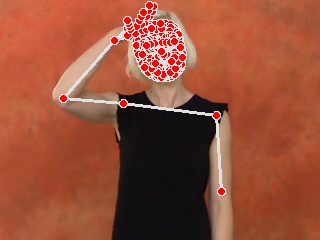

In [16]:
# man (video 0, frame 22)
img_man = image.load_img("{}/man/0/frame22.jpg". format(DATA_PATH))
print("ACTION: Man    Video: 0     Frame: 22")
img_man

## Creating Labels and Features

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting data in 80:10:10 train:validation:test ratio
def trainTestSplit(X,y):
    x_train, x_temp, y_train, y_temp= train_test_split(X, y, test_size=0.2, random_state=42)
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state=42)
    return x_train, y_train, x_val, y_val, x_test, y_test

### Preparing Data with 'Mediapipe Landmarks' stored as numpy arrays

In [7]:
total_video_count = totalVideoCount(DATA_PATH)
temp_list = ['police', 'follow', 'call']
subset_video_count = {}
for temp in temp_list:
    subset_video_count[temp] = total_video_count[temp]
    
print(subset_video_count)

{'police': 10, 'follow': 9, 'call': 12}


In [8]:
# Setting numeric labels for non numeric action category values
# label_map = {label:num for num, label in enumerate(videoCount.keys())} # all classes
label_map = {label:num for num, label in enumerate(subset_video_count.keys())} #subset of classes

In [13]:
print(label_map)

{'police': 0, 'follow': 1, 'call': 2}


In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [14]:
#features = non target columns    labels = target columns

max_fc = 60
features, labels = [], []
# Iterating through each action
for action in subset_video_count.keys():
    # Iterting through each video in the action
    for sequence in range(subset_video_count[action]):
        # Declaring a list to store the frames of each video
        window = []
        # Iterating through each landmark numpy array
        for frame_num in range(max_fc):
            
            # Declaring directory of the keypoints
            IMAGE_PATH = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))
            
            # Loading the numpy array
            res = np.load(IMAGE_PATH)
            
            # Appending to the list
            window.append(res)
            
        # Adding to the dataset
        features.append(window)
        labels.append(label_map[action])

FileNotFoundError: [Errno 2] No such file or directory: 'Frames\\police\\1\\33.npy'

In [ ]:
# np.array(features).shape
X = np.array(features)

In [ ]:
# np.array(labels).shape
# The below code will convert the target class to this format: [1,0,0], [0,1,0], [0,0,1] 
y = to_categorical(labels).astype(int)
y

In [ ]:
# Splitting into Train, Validation and Test
X_train, y_train, X_val, y_val, X_test, y_test = trainTestSplit(X, y)

### Preparing Data with Extracted Frames

In [22]:
IMAGE_PATH = r'C:\Users\revan\Downloads\frame101.jpg'
DATA_PATH = r'C:\Users\revan\Downloads\BOOK.mp4'
IM_PATH = r'C:\Users\revan\Downloads\frame101.npy'

In [23]:
# cap = cv2.VideoCapture(DATA_PATH)
# # DATAPATH = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))
frame = cv2.imread(IMAGE_PATH)
frame = frame[:, :, [2, 1, 0]]
# image = Image.fromarray(frame.astype('uint8')) 
# new_image := np.array(image)
# cv2.imwrite(IM_PATH,new_image)
# image.show()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:696: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'cv::imwrite_'


In [ ]:
max_fc = 60
videoFrames=[]
videolabels=[]
# Iterating through each action
for action in subset_video_count.keys():
    # Iterting through each video in the action
    for sequence in range(subset_video_count[action]):
        # Declaring a list to store the frames of each video
        frames = []
        # Iterating through each landmark numpy array
        for frame_num in range(max_fc):
            # Loading the image frame
            frame = cv2.imread(os.path.join(DATA_PATH, action, str(sequence), "frame{}".format(frame_num) + ".jpg"))
            
            # Converting BGR -> RGB
            frame = frame[:, :, [2, 1, 0]]
            
            # Normalize the pixel values
            frame = frame / 255.0
            
            # Appending to the list
            frames.append(frame)
            
        # Adding to the dataset
        videoFrames.append(frames)
        videolabels.append(label_map[action])

In [ ]:
# np.array(features).shape
X = np.array(videoFrames)

In [ ]:
np.array(labels).shape
# The below code will convert the target class to this format: [1,0,0], [0,1,0], [0,0,1] 
y = to_categorical(videolabels).astype(int)
y

In [ ]:
# Splitting into Train, Validation and Test
X_train, y_train, X_val, y_val, X_test, y_test = trainTestSplit(X, y)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

## Building the model

In [7]:
# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

RESNET 50

In [ ]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [ ]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

3D CNN

In [ ]:
import numpy as np 
import h5py
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(layers.Conv3D(32,(3,3,3),activation='relu',input_shape=(16,16,16,1),bias_initializer=Constant(0.01)))
model.add(layers.Conv3D(32,(3,3,3),activation='relu',bias_initializer=Constant(0.01)))
model.add(layers.MaxPooling3D((2,2,2)))
model.add(layers.Conv3D(64,(3,3,3),activation='relu'))
model.add(layers.Conv3D(64,(2,2,2),activation='relu'))
model.add(layers.MaxPooling3D((2,2,2)))
model.add(layers.Dropout(0.6))
model.add(layers.Flatten())
model.add(layers.Dense(256,'relu'))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(128,'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,'softmax'))
model.summary()

In [ ]:
model.compile(Adam(0.001),'categorical_crossentropy',['accuracy'])
model.fit(xtrain,ytrain,epochs=200,batch_size=32,verbose=1,validation_data=(xtest,ytest),callbacks=[EarlyStopping(patience=15)])
Testing the 3D-CNN
_, acc = model.evaluate(xtrain, ytrain)
print('training accuracy:', str(round(acc*100, 2))+'%')
_, acc = model.evaluate(xtest, ytest)
print('testing accuracy:', str(round(acc*100, 2))+'%')

TRANSFORMER

In [ ]:
import tensorflow as tf
from tensorflow import keras
# Define the number of layers, heads, and dimensions of the model
num_layers = 6
num_heads = 8
d_model = 512
# Define the encoder and decoder layers
encoder_layers = [
    keras.layers.MultiHeadAttention(num_heads, d_model),
    keras.layers.Dropout(0.1),
    keras.layers.Add(),
    keras.layers.LayerNormalization()
]
decoder_layers = [
    keras.layers.MultiHeadAttention(num_heads, d_model),
    keras.layers.Dropout(0.1),
    keras.layers.Add(),
    keras.layers.LayerNormalization()
]
# Create the encoder and decoder
encoder = keras.layers.Encoder(encoder_layers, num_layers)
decoder = keras.layers.Decoder(decoder_layers, num_layers)
# Define the final model
model = keras.models.Transformer(encoder, decoder)
# Define the optimizer and loss function
optimizer = keras.optimizers.Adam()
loss_fn = keras.losses.CategoricalCrossentropy()
# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn)
# Train the model on your dataset
model.fit(x_train, y_train, epochs=10, batch_size=64)

## Training the model

In [ ]:
#Splitting the data into train, validation and test datasets

In [ ]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [ ]:
# launch the training
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")